# TP4 M1 info -- Introduction au traitement du signal, aux signaux sonores et aux images -- A la découverte des signaux audio

**But du TP** :
* obtenir une représentation spectrale et cepstrale
* faire l'extraction des paramètres temporels
* réaliser une représentation en spectrogramme

**Avertissement** :
Il peut être tentant d'utiliser ChatGPT ou d'autres outils d'écriture de code. Mais il ne s'agit que d'une introduction, couvrant des concepts très simples pour manipuler des fichiers. Nous vous recommandons fortement de ne pas l'utiliser. Vous aurez suffisamment de temps pour réaliser par vous-même les quelques fonctions qui vous sont demandées. Et vous les assimilerez bien mieux. Vous devrez réutiliser ces fonctions pour l'évaluation, ce qui vous confrontera à de nouvelles données. Essayez donc de rendre ces fonctions aussi générales que possible.

**Astuces**:
* Essayez de faire fonctionner vos algorithmes sur n'importe quelle taille d'image.
* N'hésitez pas à créer des fonctions pour chaque partie des traitements.

In [3]:
# OS setup
!cat /etc/os-release
!apt-get install -q=2 tree

# Data loading
!git clone https://gitlab.com/jeromefarinas/tp-m1-ts.git

PRETTY_NAME="Ubuntu 22.04.3 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.3 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy
Selecting previously unselected package tree.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
Cloning into 'tp-m1-ts'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 78 (delta 1), reused 0 (delta 0), pack-reused 58
Receiving objects: 100% (78/78), 4.11 MiB | 13.71 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [4]:
# Some usefull library
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
from IPython.display import Audio

##Paramétrage spectral et cepstral

En utilisant les échantillons 27800 à 28823 du fichier L1.wav (/contents/tp-m1-ts/tp4/L1.wav), afficher sur une seule figure (utiliser [matplotlib.pyplot.subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html), [numpy.log](https://numpy.org/doc/stable/reference/generated/numpy.log.html), [numpy.hamming](https://numpy.org/doc/stable/reference/generated/numpy.hamming.html), [numpy.fft.fft](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html), [abs](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html)...) :
- l'extrait du signal, composé de 1024 points,
- le spectre (après fenêtrage de Hamming),
- le cepstre (en effectuant une transformée de Fourier sur le logarithme du spectre).

Affichez, pour chaque tracé, le titre, le nom des axes et fixez l'abscisse en secondes ou en Hertz selon le cas.

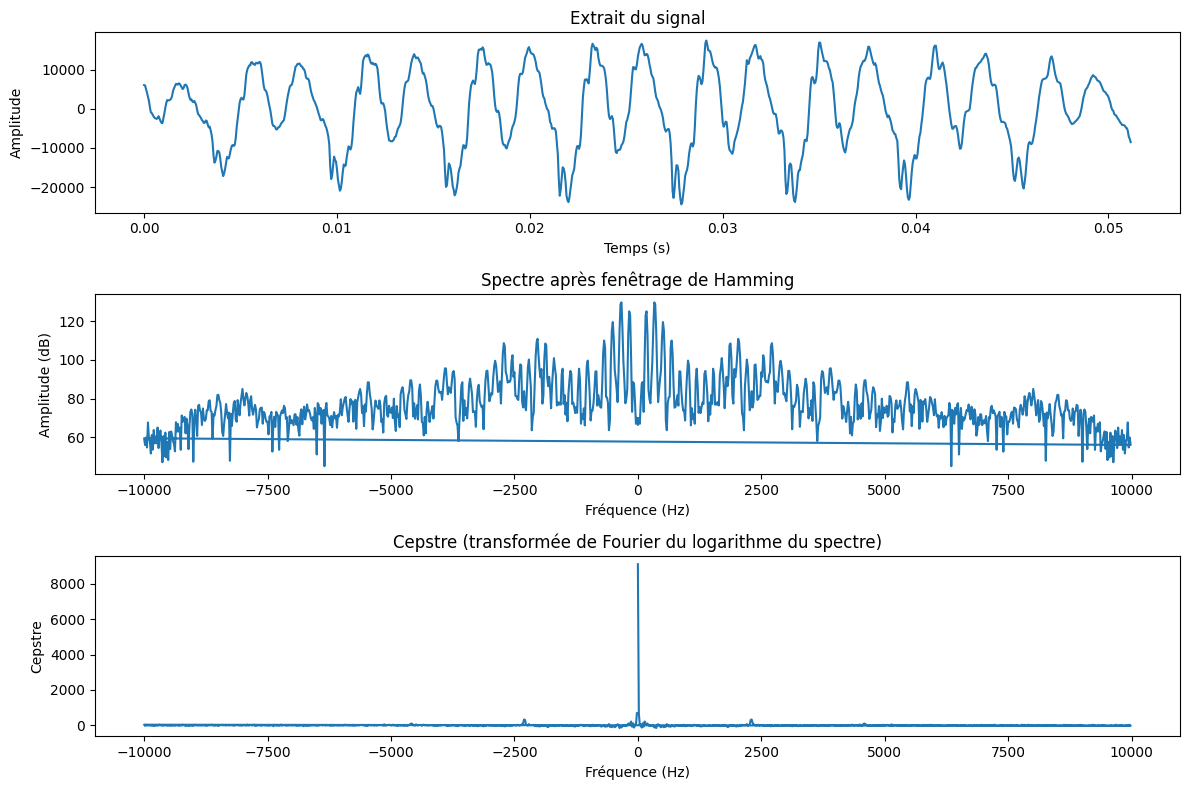

In [5]:
# Chargement du fichier audio
filename = '/content/tp-m1-ts/tp4/L1.wav'
fs, signal = scipy.io.wavfile.read(filename)

# Extrait du signal (1024 points)
signal_excerpt = signal[27800:28824]

# Temps en secondes pour l'abscisse
time = np.arange(len(signal_excerpt)) / fs

# Fenêtrage de Hamming
hamming_window = np.hamming(len(signal_excerpt))
signal_windowed = signal_excerpt * hamming_window

# Calcul du spectre
spectrum = np.fft.fft(signal_windowed)

# Calcul du cepstre
cepstrum = np.fft.fft(np.log(np.abs(spectrum)))

# Fréquences en Hertz pour l'abscisse du spectre
freqs = np.fft.fftfreq(len(spectrum), 1/fs)

# Affichage des résultats
plt.figure(figsize=(12, 8))

# Signal
plt.subplot(3, 1, 1)
plt.plot(time, signal_excerpt)
plt.title('Extrait du signal')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')

# Spectre
plt.subplot(3, 1, 2)
plt.plot(freqs, 20 * np.log10(np.abs(spectrum)))
plt.title('Spectre après fenêtrage de Hamming')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude (dB)')

# Cepstre
plt.subplot(3, 1, 3)
plt.plot(freqs, np.real(cepstrum))
plt.title('Cepstre (transformée de Fourier du logarithme du spectre)')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Cepstre')

plt.tight_layout()
plt.show()


# Extraction des paramètres temporels

**Conseil** : Passez les échantillons en nombre réels [-1,1] pour effectuer les calculs suivants.

* Utilisez la fonction d'énergie vue dans le TD pour calculer l'énergie à court terme d'un signal en fonction de la taille de la fenêtre d'analyse.

In [ ]:
# A vous...
# Normalisation des échantillons entre -1 et 1
max_abs_value = np.max(np.abs(signal))
signal_normalized = signal.astype(np.float32) / max_abs_value

def short_term_energy(signal, window_size):
    energy = np.zeros(len(signal) - window_size + 1)
    for i in range(len(energy)):
        energy[i] = np.sum(signal[i:i+window_size]**2)
    return energy

window_size = 256  # Taille de la fenêtre d'analyse
energy = short_term_energy(signal_normalized, window_size)
print(energy)

def energie_court(signal, window_size):
  recouvrement = window_size//2
  nb_fen = ((np.size(signal) - window_size) // recouvrement) + 1
  energie = np.zeros(nb_fen)

  for fen in range(nb_fen):
    p = fen * recouvrement
    energie[fen] = np.sum(signal[p:p + window_size] ** 2) / window_size

  return energie

energy2 = energie_court(signal_normalized, window_size)
print(energy2)

[0.00163702 0.00163866 0.00163363 ... 0.00157735 0.00160435 0.00160031]
[6.39459449e-06 6.40091594e-06 6.03174340e-06 ... 5.36012476e-06
 5.67935740e-06 6.25120310e-06]


* Sur la base de la fonction précédente, écrivez une fonction zcr qui calcule le taux de passage à zéro (ZCR) d'un signal passé en paramètre.

**Rappel de cours** : pour une fenêtre à l'instant t,
$ZCR(t) = \frac{1}{2N} \sum_{n=1}^{N}\left | sign(x_{n}) - sign(x_{n-1}) \right |$
Vous pouvez utiliser la fonction [numpy.sign](https://numpy.org/doc/stable/reference/generated/numpy.sign.html).



In [ ]:
# A vous...
def ZCR(signal, window_size):
    zcr = np.zeros(len(signal) - window_size + 1)
    for i in range(len(zcr)):
        segment = signal[i:i+window_size]
        zcr[i] = 0.5 * np.mean(np.abs(np.diff(np.sign(segment))))
    return zcr

window_size = 256  # Taille de la fenêtre d'analyse
zcr = ZCR(signal_normalized, window_size)

print(zcr)

def zcr2(signal, fenetre_size):
  recouvrement = fenetre_size//2
  nb_fen = (np.size(signal) - fenetre_size) // recouvrement + 1
  zcr_res = np.zeros(nb_fen)

  for fen in range(nb_fen):
    p = fen * recouvrement
    zcr_res[fen] = np.sum(np.abs(np.sign(signal[p+1:p+fenetre_size]) - np.sign(signal[p:p+fenetre_size-1]))) / fenetre_size

  return zcr_res

zcr2 = zcr2(signal_normalized, window_size)

print(zcr2)

[0.44705883 0.44705883 0.44705883 ... 0.46666667 0.46666667 0.47058824]
[0.890625  0.828125  0.8515625 ... 1.125     1.09375   0.9375   ]


* Puis, affichez sur une même figure le signal, la courbe de l'énergie et la courbe du ZCR. Qu'observez-vous ? En déduire l'intérêt de ces paramètres.

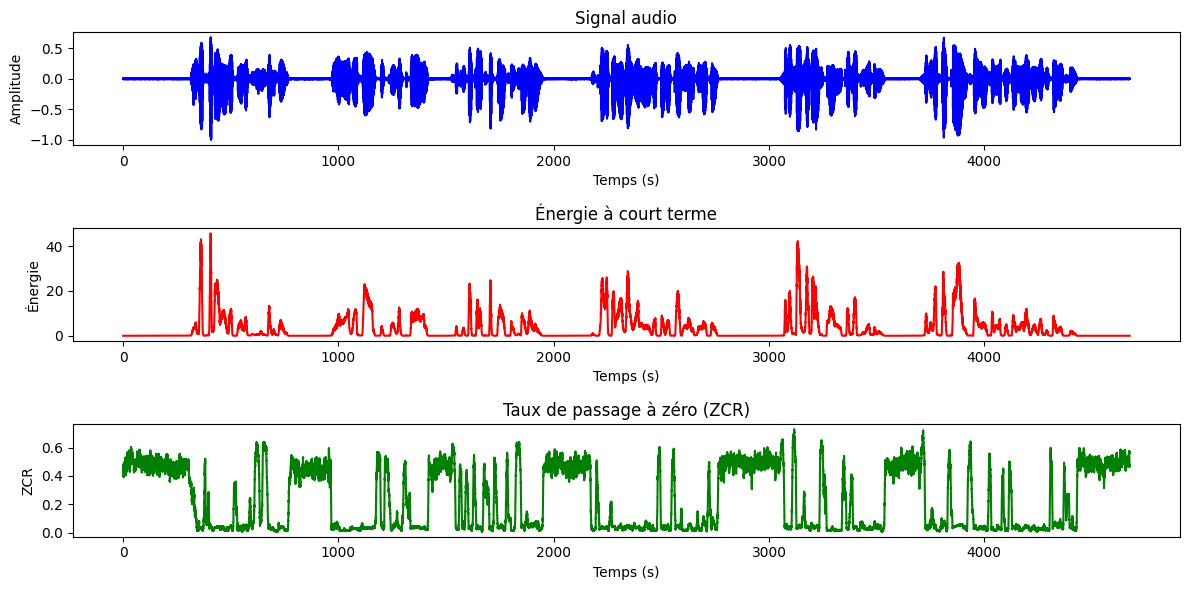

In [ ]:
# A vous...
new_time = np.arange(len(energy)) * (window_size / fs)

plt.figure(figsize=(12, 6))

# Signal audio
plt.subplot(3, 1, 1)
plt.plot(new_time, signal_normalized[:len(new_time)], color='b')
plt.title('Signal audio')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')

# Courbe d'énergie
plt.subplot(3, 1, 2)
plt.plot(new_time, energy, color='r')
plt.title('Énergie à court terme')
plt.xlabel('Temps (s)')
plt.ylabel('Énergie')

# Courbe du ZCR
plt.subplot(3, 1, 3)
plt.plot(new_time, zcr, color='g')
plt.title('Taux de passage à zéro (ZCR)')
plt.xlabel('Temps (s)')
plt.ylabel('ZCR')

plt.tight_layout()
plt.show()


Votre réponse...

En observant ces courbes, vous pouvez repérer des moments où l'énergie ou le taux de passage à zéro du signal varie significativement. Cela peut être utile pour l'analyse et la segmentation du signal audio, par exemple pour détecter les transitions entre les différentes parties d'une piste musicale ou les mots dans la parole.






# Représentation du spectrogramme

* Reprendre la fonction spectro vue en TD, qui calcule le spectrogramme d'un signal en fonction de la taille de la fenêtre d'analyse.

In [17]:
# A vous...
def spectro(signal, taille_fenetre, pas):
  taille = np.size(signal)
  nb_fen = int(np.floor((taille - taille_fenetre) / pas) + 1)
  spect = np.zeros((taille_fenetre // 2, nb_fen))

  for i in range(nb_fen):
    p = i * pas
    spectre = abs(np.fft.fft(signal[p:p+taille_fenetre]))
    spect[:, i] = np.transpose(spectre[:taille_fenetre//2])

  return spect

* Afficher le spectrogramme du fichier L1.wav sous forme d'image à l'aide de la fonction suivante : [matplotlib.pyplot.plt.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)(spectrogram, extent=\[0, **time**, 0, **freq**\], aspect="auto", origin="lower"). Les limites **time** et **freq** doivent être calculées par vos soins.

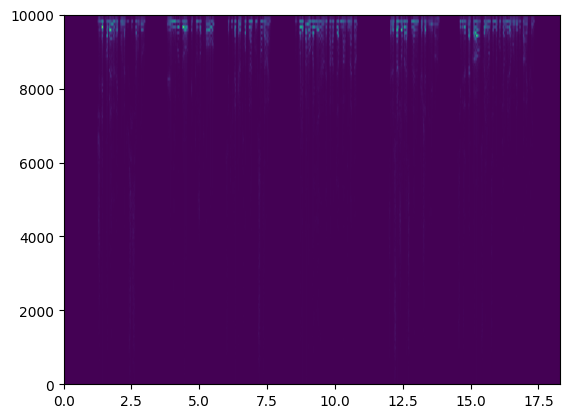

In [28]:
# A vous...
tailleF = 256
pas = tailleF // 2
spectroS = spectro(signal, tailleF, pas)
plt.imshow(spectroS, extent=[0, len(signal)/fs, 0, fs/2], aspect="auto")

* Comparez votre fonction spectro avec matplotlib.pyplot.specgram(sig, Fs=fs, window=ham1024, NFFT=1024). Que remarquez-vous ?



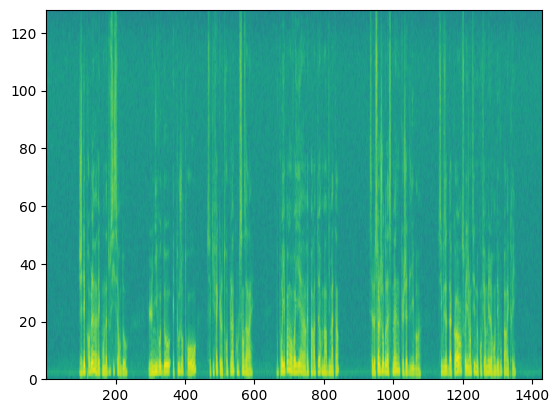

In [33]:
# A vous...
#ham1024 = np.hamming(len(signal[27800:28824]))
plt.specgram(signal, Fs=256)
plt.show()

Vos commentaires...